Author: Ryan Corbyn 

Date: 09/12/2020

Edits: 

Description: Plots the ODMR contrast vs microwave power.

Plots ODMR contrast vs microwave power. 
plot FWHM vs microwave power. 
plot r squared vs microwave power. 


In [1]:
import numpy as np 
import matplotlib.pyplot as plot 
import scipy.optimize as opt

In [2]:
def saturation_curve(P_uw, c_inf, P_sat):
    # creates a saturation curve.
    # y = Contrast as a functin of applied power, c_inf = maximum ODMR contrast
    # P_sat = stauration power.
    y = (c_inf * P_uw)/(P_uw + P_sat)
    return(y)

In [3]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 20})
    plot.rcParams.update({'figure.figsize' :[12, 10]})

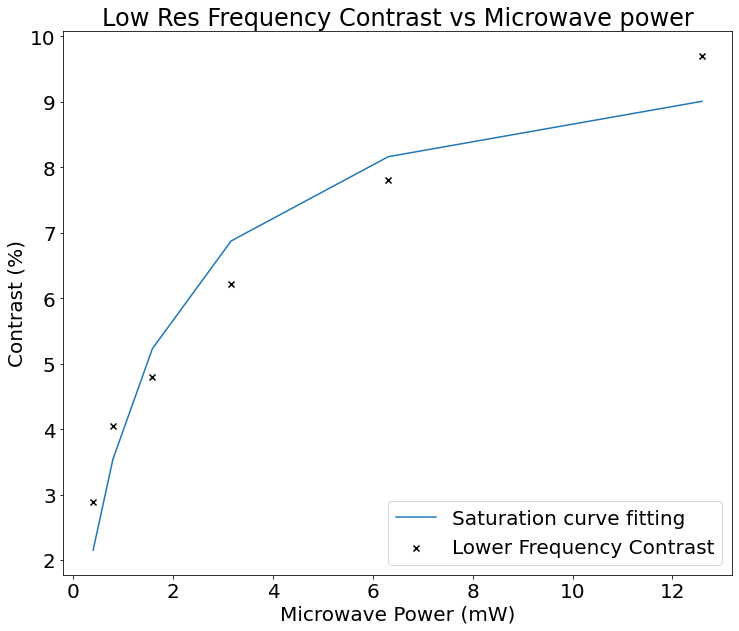

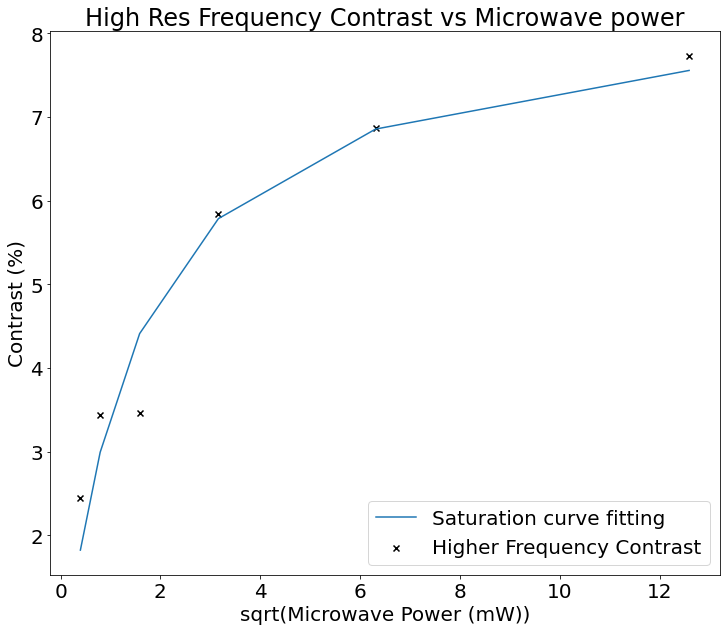

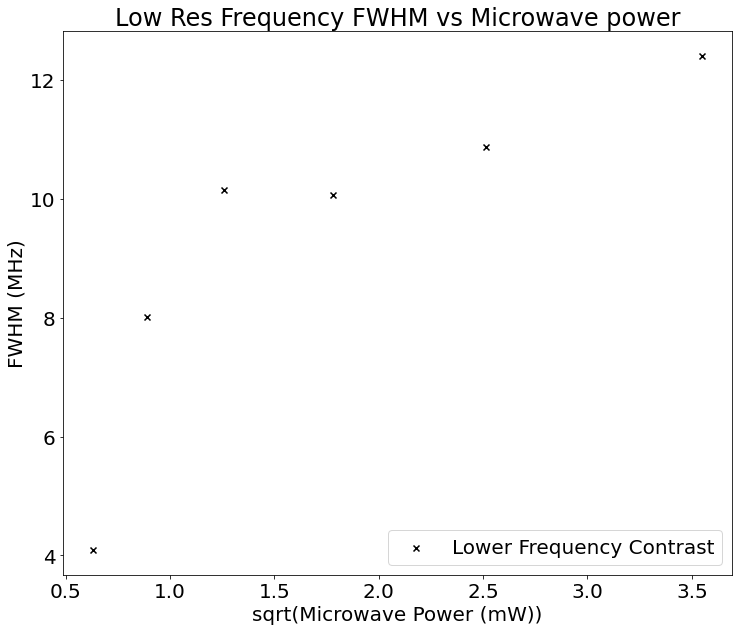

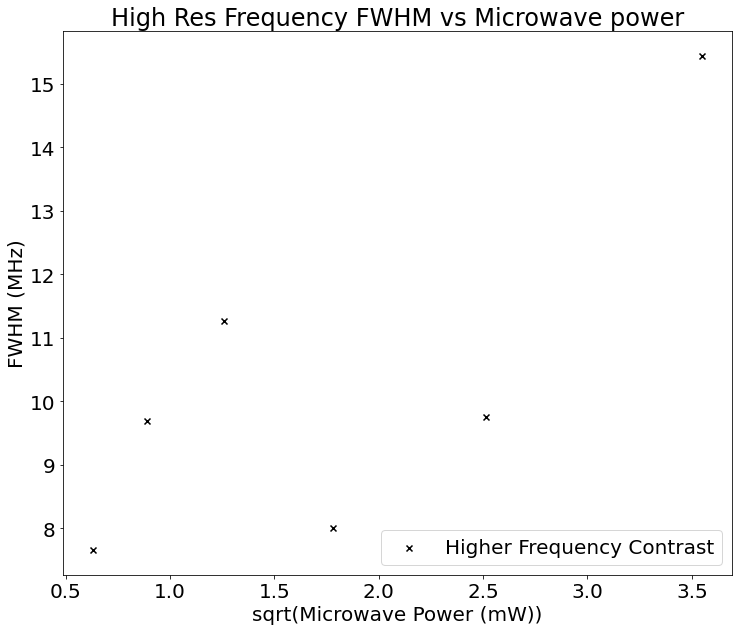

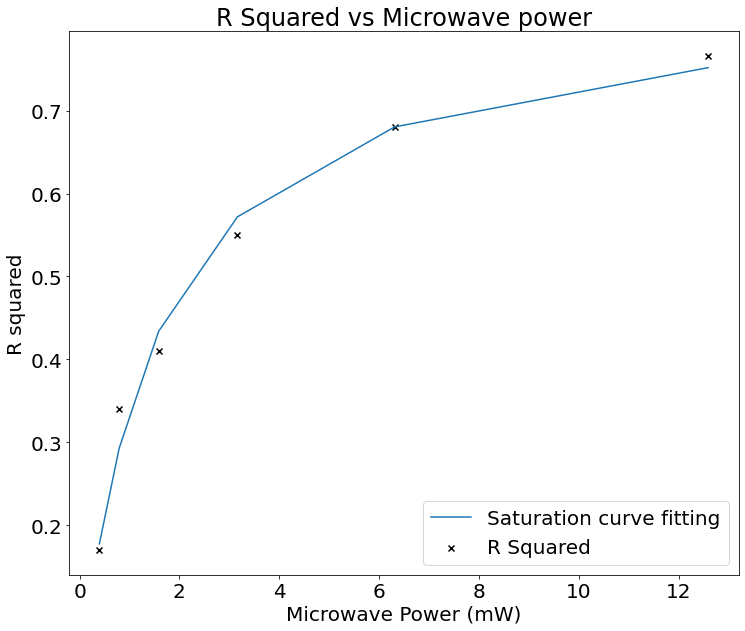

In [8]:
# microwave power 
m_power = np.array([-4, -1, 2, 5, 8, 11])
m_power_after_amp = m_power + 20
m_power_mW = np.power(10, m_power/10)

low_res_contrast = np.array([2.88, 4.04, 4.80, 6.22, 7.81, 9.70])
low_contrast_fwhm = np.array([4.09, 8.01, 10.14, 10.06, 10.87, 12.4])
high_res_contrast = np.array([2.44, 3.44, 3.46, 5.84, 6.87, 7.73])
high_contrast_fwhm = np.array([7.66, 9.688, 11.26, 8.01, 9.76, 15.44])

r_squared = np.array([0.17, 0.34, 0.41, 00.55, 0.68,  0.766])

set_plot_params()

fig1, ax1 = plot.subplots()
ax1.scatter(m_power_mW, low_res_contrast, marker = 'x', 
           color = 'k', label = 'Lower Frequency Contrast')
ax1.set_xlabel('Microwave Power (mW)')
ax1.set_ylabel('Contrast (%)')
P0 = [1,12]
contrast_coeffs, confidence = opt.curve_fit(saturation_curve, m_power_mW, low_res_contrast, P0)
y_fit = saturation_curve(m_power_mW, contrast_coeffs[0], contrast_coeffs[1])
plot.plot(m_power_mW, y_fit, label = 'Saturation curve fitting')
ax1.set_title('Low Res Frequency Contrast vs Microwave power')
ax1.legend(loc='lower right')

fig2, ax2 = plot.subplots()
ax2.scatter(m_power_mW, high_res_contrast, marker = 'x', 
           color = 'k', label = 'Higher Frequency Contrast')
ax2.set_xlabel('sqrt(Microwave Power (mW))')
ax2.set_ylabel('Contrast (%)')
P0 = [1,12]
contrast_coeffs2, confidence = opt.curve_fit(saturation_curve, m_power_mW, high_res_contrast, P0)
y_fit = saturation_curve(m_power_mW, contrast_coeffs2[0], contrast_coeffs2[1])
plot.plot(m_power_mW, y_fit, label = 'Saturation curve fitting')
ax2.legend(loc='lower right')
ax2.set_title('High Res Frequency Contrast vs Microwave power')

fig3, ax3 = plot.subplots()
ax3.scatter(np.sqrt(m_power_mW), low_contrast_fwhm, marker = 'x', 
           color = 'k', label = 'Lower Frequency Contrast')
ax3.set_xlabel('sqrt(Microwave Power (mW))')
ax3.set_ylabel('FWHM (MHz)')
P0 = [20,0.1]
contrast_coeffs3, confidence = opt.curve_fit(saturation_curve, np.sqrt(m_power_mW)[2:8], low_contrast_fwhm[2:8], P0)
y_fit = saturation_curve(np.sqrt(m_power_mW), contrast_coeffs3[0], contrast_coeffs3[1])
#plot.plot(np.sqrt(m_power_mW), y_fit, label = 'Saturation curve fitting')
ax3.legend(loc='lower right')
ax3.set_title('Low Res Frequency FWHM vs Microwave power')

fig4, ax4 = plot.subplots()
ax4.scatter(np.sqrt(m_power_mW), high_contrast_fwhm, marker = 'x', 
           color = 'k', label = 'Higher Frequency Contrast')
ax4.set_xlabel('sqrt(Microwave Power (mW))')
ax4.set_ylabel('FWHM (MHz)')
P0 = [20,0.1]
contrast_coeffs4, confidence = opt.curve_fit(saturation_curve, np.sqrt(m_power_mW), high_contrast_fwhm, P0)
y_fit = saturation_curve(np.sqrt(m_power_mW), contrast_coeffs4[0], contrast_coeffs4[1])
#plot.plot(np.sqrt(m_power_mW), y_fit, label = 'Saturation curve fitting')
ax4.legend(loc='lower right')
ax4.set_title('High Res Frequency FWHM vs Microwave power')

fig5, ax5 = plot.subplots()
ax5.scatter(m_power_mW, r_squared, marker = 'x', 
           color = 'k', label = 'R Squared')
ax5.set_xlabel('Microwave Power (mW)')
ax5.set_ylabel('R squared')
P0 = [20,0.1]
contrast_coeffs5, confidence = opt.curve_fit(saturation_curve, m_power_mW, r_squared, P0)
y_fit = saturation_curve(m_power_mW, contrast_coeffs5[0], contrast_coeffs5[1])
plot.plot(m_power_mW, y_fit, label = 'Saturation curve fitting')
ax5.legend(loc='lower right')
ax5.set_title('R Squared vs Microwave power')

save_folder = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\ODMR\\20201127\\Microwave_power_saturation\\ND2\\'

fig1.savefig(save_folder + '20201209_Low_freq_contrast_vs_power' + '.png')
fig2.savefig(save_folder + '20201209_High_freq_contrast_vs_power' + '.png')
fig3.savefig(save_folder + '20201209_Low_freq_FWHM_vs_power' + '.png')
fig4.savefig(save_folder + '20201209_High_freq_FWHM_vs_power' + '.png')
fig5.savefig(save_folder + '20201209_R_squared_vs_power' + '.png')

In [43]:
print(m_power_mW)

[ 0.1         0.19952623  0.39810717  0.79432823  1.58489319  3.16227766
  6.30957344 12.58925412]
